In [11]:
import numpy as np
import pandas as pd
import seaborn as sns

In [15]:
print("numpy", np.__version__)
print("pandas",pd.__version__)
print("seaborn",sns.__version__)

numpy 1.26.4
pandas 2.2.3
seaborn 0.13.2


In [17]:
df= pd.read_csv("spam.csv",encoding='ISO-8859-1')

In [19]:
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [23]:
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [25]:
df.drop(columns = ["Unnamed: 2","Unnamed: 3","Unnamed: 4"],inplace = True)

In [27]:
df.sample(5)

,v1,v2
622,ham,MAKE SURE ALEX KNOWS HIS BIRTHDAY IS OVER IN F...
5283,ham,"Yeah, probably here for a while"
5550,ham,"Cool, what time you think you can get here?"
4745,ham,Orh i tot u say she now still dun believe.
5394,ham,I dont know exactly could you ask chechi.


In [29]:
#rename columsn
df.rename(columns = {'v1':'target','v2':'text'},inplace = True)

In [31]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()


In [33]:
df.columns

Index(['target', 'text'], dtype='object')

In [35]:
df["target"] = encoder.fit_transform(df['target'])

In [37]:
#check for duplicate value
df.duplicated().sum()

403

In [39]:
df = df.drop_duplicates(keep = 'first')

In [41]:
df.shape

(5169, 2)

##EDA

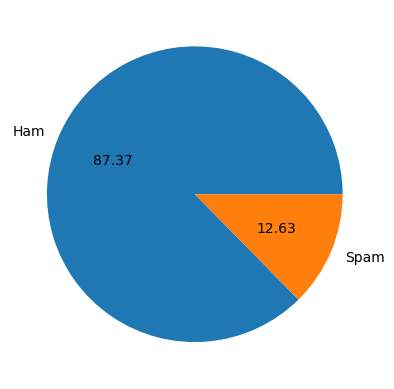

In [43]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels = ["Ham","Spam"],autopct = "%0.2f")
plt.show()

In [45]:
#data is imblanced 
import nltk

In [46]:
!pip install nltk

In [140]:
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [53]:
df.loc[:, "num_char"] = df["text"].apply(len)

In [63]:
df.head()


,target,text,num_char,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [65]:
#fetch number of words from text
df.loc[:,"num_words"] = df["text"].apply(lambda x:len(nltk.word_tokenize(x)))

In [67]:
df.loc[:,"num_sentences"] =df["text"].apply(lambda x:len(nltk.sent_tokenize(x)))

In [59]:
df.describe()

,target,num_char,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000,5169.000000
mean,0.126330,78.977945,18.455794,1.965564
std,0.332253,58.236293,13.324758,1.448541
min,0.000000,2.000000,1.000000,1.000000
25%,0.000000,36.000000,9.000000,1.000000
50%,0.000000,60.000000,15.000000,1.000000
75%,0.000000,117.000000,26.000000,2.000000
max,1.000000,910.000000,220.000000,38.000000


In [69]:
#ham ie no spam 
df[df["target"]==0][["num_char","num_words","num_sentences"]].describe()

,num_char,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [71]:
#spam 
df[df["target"] == 1][["num_char","num_words","num_sentences"]].describe()

,num_char,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [73]:
import seaborn as sns

<Axes: xlabel='num_char', ylabel='Count'>

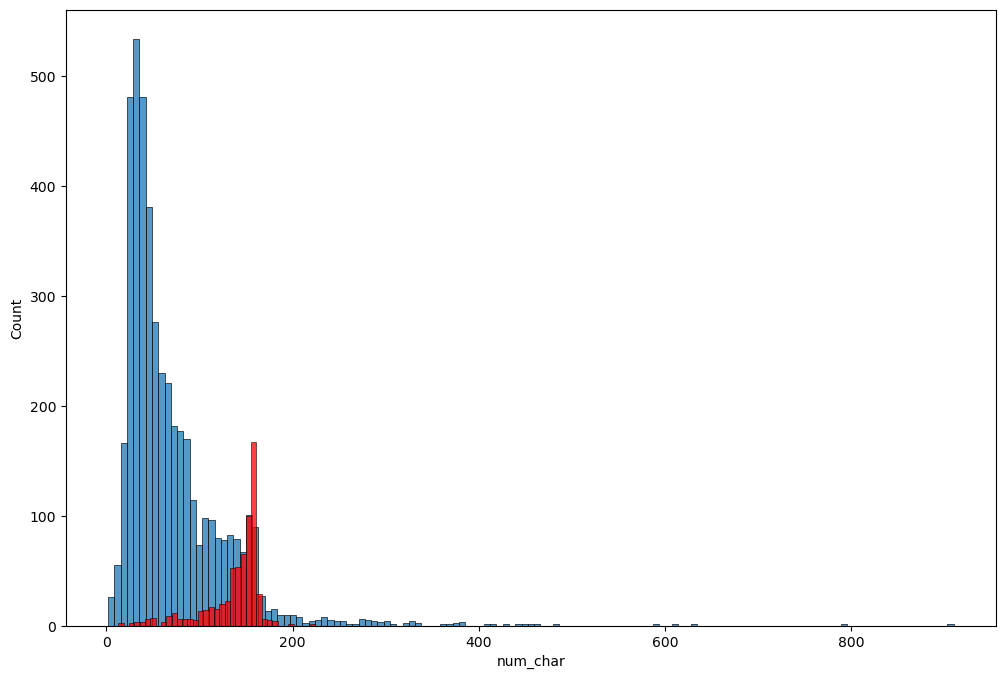

In [75]:
plt.figure(figsize = (12,8))
sns.histplot(df[df["target"]==0]["num_char"])
sns.histplot(df[df["target"]==1]["num_char"],color = 'red')


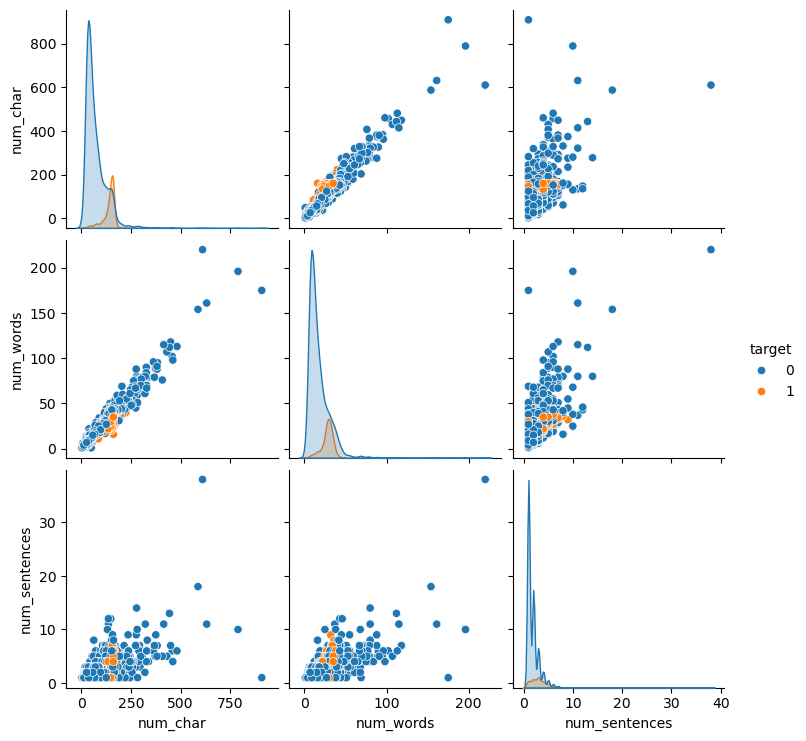

In [77]:
sns.pairplot(df,hue = 'target')

In [78]:
df_numeric  = df[["target","num_char","num_words","num_sentences"]]

In [79]:
corr_matrix = df_numeric.corr()

<Axes: >

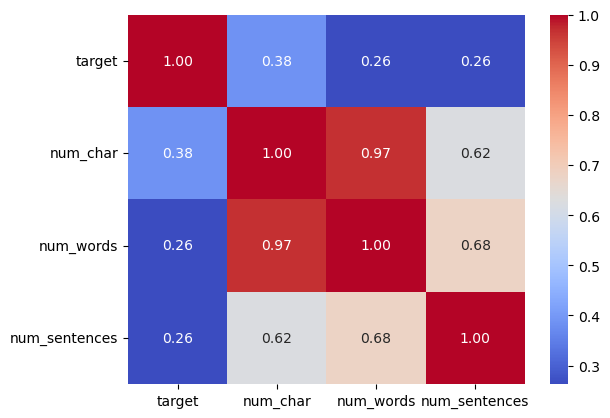

In [83]:
sns.heatmap(corr_matrix, annot = True , cmap = 'coolwarm', fmt = '.2f')

####data preprocessing, text part:
lowercase,tokenization, removing special character, removing stop worda and punctucation, stemming 


In [86]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    #this is use to remove special character
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    text = y[:]
    y.clear()

    for i in text: 
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    text = y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))
    return " ".join(y)

In [102]:
transform_text("i love the youtube lectures on machine learning how about you and yourself ")

'love youtub lectur machin learn'

In [90]:
from nltk.corpus import stopwords
nltk.download('stopwords')

#this stopwords is use to remove the stop words, they have no contribution on meaning, only help in sentence formation like a an the 

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [94]:
stopwords.words("english")

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [96]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [98]:
#stemming : is taking word to root/basic for like, dancing to danc, loving to lov
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('dancing')

'danc'

In [103]:
#applying above function to our dataset

df["transform_text"] = df["text"].apply(transform_text)


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_4056\1589357593.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["transform_text"] = df["text"].apply(transform_text)


In [104]:
#A word cloud is a technique to show which words are the most frequent in the given text
!pip install wordcloud
from wordcloud import WordCloud
wc = WordCloud(width = 500, height = 500, min_font_size = 10, background_color = "white")

In [105]:
spam_wc = wc.generate(df[df['target']==1]['transform_text'].str.cat(sep=" "))

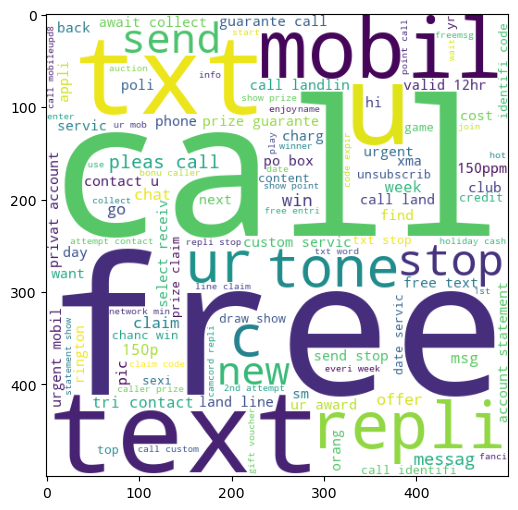

In [106]:
plt.figure(figsize =(12,6))
plt.imshow(spam_wc)

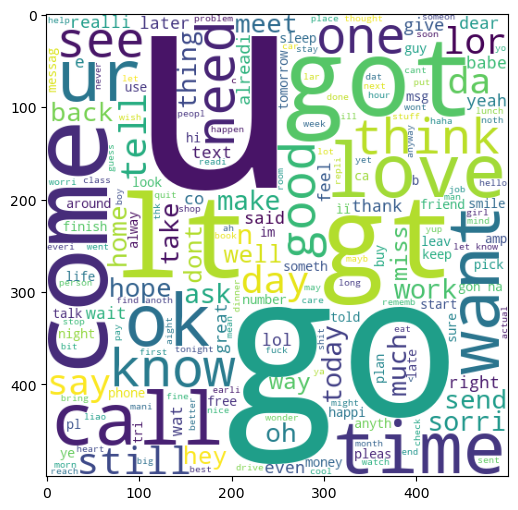

In [217]:
#for ham too word cloud is 
ham_wc = wc.generate(df[df['target']==0]['transform_text'].str.cat(sep=" "))
plt.figure(figsize =(12,6))
plt.imshow(ham_wc)

In [131]:
spam_corpus = []
for msg in df[df["target"]==1]['transform_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)
        

In [133]:
from collections import Counter
spam_word = pd.DataFrame(Counter(spam_corpus).most_common(30))


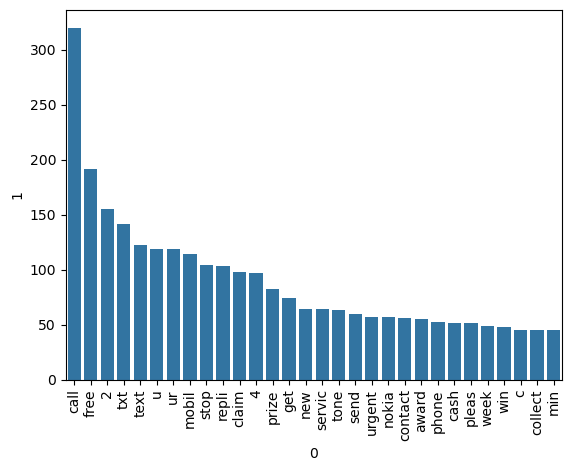

In [135]:
sns.barplot(x=spam_word[0], y =spam_word[1])
plt.xticks(rotation ='vertical')
plt.show()

In [137]:
ham_corpus = []
for msg in df[df["target"]==0]['transform_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)
len(ham_corpus)     

35404

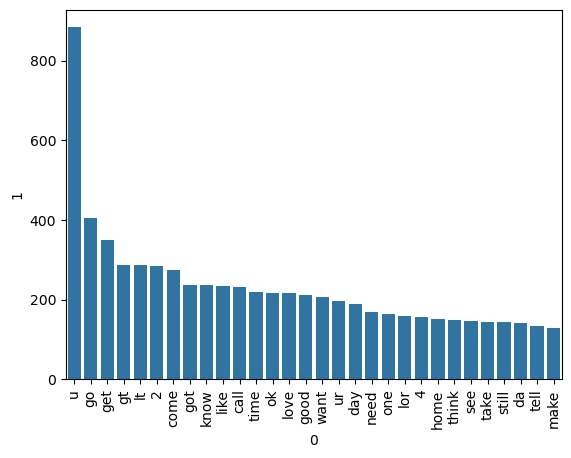

In [139]:
ham_word = pd.DataFrame(Counter(ham_corpus).most_common(30))
sns.barplot(x=ham_word[0], y =ham_word[1])
plt.xticks(rotation ='vertical')
plt.show()

## model building

In [141]:
#converting our text to number for model training, multiple method for vectorization one is bag of word and build model on naive base model 
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features = 3000)

In [143]:
x = tfidf.fit_transform(df["transform_text"]).toarray()

In [145]:
x.shape

(5169, 3000)

In [147]:
y = df["target"]. values

In [149]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2, random_state = 2)

In [151]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix,precision_score

In [153]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [155]:
gnb.fit(x_train,y_train)
y_pred1 = gnb.predict(x_test)
print("GNB scores")
print("accuracy", accuracy_score(y_test,y_pred1))
print("conufsion score", confusion_matrix(y_test,y_pred1))
print("precision score", precision_score(y_test,y_pred1))

GNB scores
accuracy 0.8694390715667312
conufsion score [[788 108]
 [ 27 111]]
precision score 0.5068493150684932


In [157]:
mnb.fit(x_train,y_train)
y_pred2 = mnb.predict(x_test)
print("MNB scores")
print("accuracy", accuracy_score(y_test,y_pred2))
print("conufsion score", confusion_matrix(y_test,y_pred2))
print("precision score", precision_score(y_test,y_pred2))

MNB scores
accuracy 0.9709864603481625
conufsion score [[896   0]
 [ 30 108]]
precision score 1.0


In [235]:
bnb.fit(x_train,y_train)
y_pred3 = bnb.predict(x_test)
print("GNB scores")
print("accuracy", accuracy_score(y_test,y_pred3))
print("conufsion score", confusion_matrix(y_test,y_pred3))
print("precision score", precision_score(y_test,y_pred3))

GNB scores
accuracy 0.9835589941972921
conufsion score [[895   1]
 [ 16 122]]
precision score 0.991869918699187


In [159]:
#tfid --> mnb due to precison score and confusion matrix of zero false postive

In [161]:
#model improvement:
# 1. change the max feature parameter of Tfidf

In [165]:
import pickle 
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))